In [1]:
import numpy as np
import numpy.random as rand
import numpy.linalg as la
import pylab as plt
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
rseed = 1932
rand.seed(rseed)

In [13]:
n = 20
sigma = 0.3 # stdev of noise

def arctan_gt(x):
  return np.arctan(5*x)

def cubic_gt(x):
  return poly(x, np.array([0, -1, 0, 1]), 3)

def relu(x):
  return x*(x >= 0)

#ground_truth = arctan_gt
#ground_truth = relu
ground_truth = cubic_gt

def Vand(x, d):
  ''' Vandermonde matrix for pts x, to degree d '''
  X = np.array([x**i for i in range(0, d)]).T
  return X

def G(x, d):
  B = np.polynomial.legendre.legvander(x, d)
  #B = B*np.sqrt(2*np.arange(0, B.shape[1], 1)+1)
  #B = np.vander(x, d+1)
  return B

#G = np.polynomial.legendre.legvander # Legendre polynomial basis
#G = Vand # uncomment this to use Vandermonde basis

def poly(pts, beta, d):
  return G(pts, d).dot(beta)

## Compute ground-truth polynomial + noise

x = np.linspace(-1, 1, n)
y = ground_truth(x)
#y += sigma*rand.normal(size=n) # random noise
y += (rand.uniform(size=n) <= 0.2)*sigma # random L0 noise
y -= (rand.uniform(size=n) <= 0.1)*2*sigma # random L0 noise

xdense = np.linspace(-1, 1, 100) # points to plot
xdense = np.sort(np.concatenate((x, xdense))) # add in the sample points explicitly
ygt = ground_truth(xdense)

def solve_reg(A, y, lamb):
  return la.solve(A.T.dot(A) + lamb * np.identity(A.shape[1]), A.T.dot(y))

def run(d, save=False):
  ''' Compute the regressor for degree d, and plot the solution. '''

  betaHat = la.pinv(G(x, d)).dot(y) # unregularized
  #betaHat = solve_reg(G(x, d), y, lamb=0.1)# regularized

  plt.figure(figsize=(7, 7))
  plt.plot(xdense, ygt, label='ground-truth')
  plt.scatter(x, y, c='r', label='samples')
  prediction = poly(xdense, betaHat, d)
  plt.plot(xdense, prediction, label='model')
  print('Test Error %f'%np.sum((prediction-ygt)**2))
  plt.ylim(-2, 2)
  plt.axis('off')
  plt.legend()
  if save: plt.savefig('figure.png')
  print('norm: ', la.norm(betaHat))

interact(run, d=widgets.IntSlider(min=1, max=10000, step=1, value=n-1))

interactive(children=(IntSlider(value=19, description='d', max=10000, min=1), Checkbox(value=False, descriptio…

<function __main__.run(d, save=False)>

Test Error 0.393390
norm:  1.4141690719444753


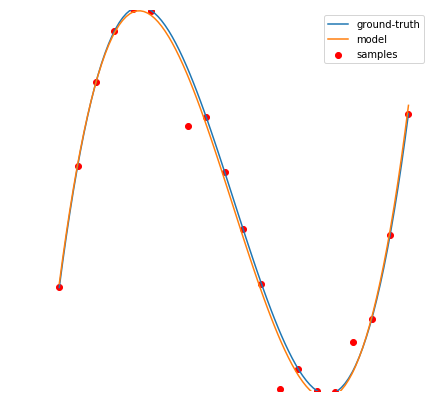

In [4]:
run(d=3)